In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd


#Reading dataset
data = pd.io.parsers.read_csv('ratings.dat',
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::', encoding='latin-1')

#Creating the rating matrix (rows as movies, columns as users)
ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(data.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

#Normalizing the matrix(subtract mean off)
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

#Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

#Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

#k-principal components to represent movies, movie_id to find recommendations, top_n print n results
k = 50
movie_id = 1 # (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

#Printing the top N similar movies
print_similar_movies(movie_data, movie_id, indexes)

Recommendations for Toy Story (1995): 

Toy Story (1995)
Simon Sez (1999)
Aladdin (1992)
Willy Wonka and the Chocolate Factory (1971)
Beauty and the Beast (1991)
E.T. the Extra-Terrestrial (1982)
Nightmare Before Christmas, The (1993)
Jumanji (1995)
Ulysses (Ulisse) (1954)
Lion King, The (1994)


<ipython-input-3-8d48f0c2cce9>:32: RuntimeWarning: invalid value encountered in divide
  similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)


Recommendations for Balto (1995): 

Balto (1995)
Someone to Watch Over Me (1987)
Fantasia (1940)
Money Train (1995)
Supergirl (1984)
Next Best Thing, The (2000)
Sabrina (1995)
Parent Trap, The (1961)
It Happened One Night (1934)
Falcon and the Snowman, The (1984)


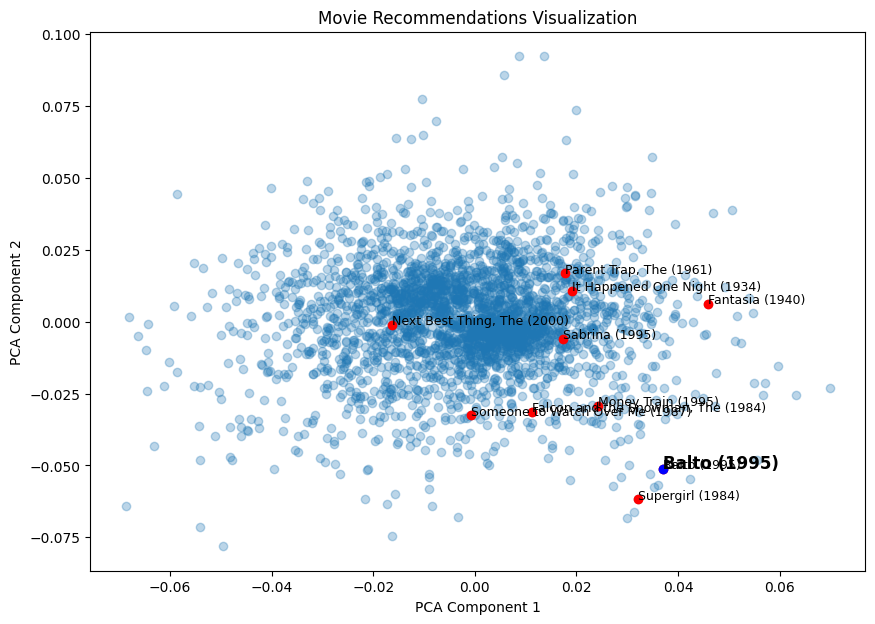

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reading dataset
data = pd.io.parsers.read_csv('ratings.dat',
    names=['user_id', 'movie_id', 'rating', 'time'],
    engine='python', delimiter='::')
movie_data = pd.io.parsers.read_csv('movies.dat',
    names=['movie_id', 'title', 'genre'],
    engine='python', delimiter='::', encoding='latin-1')

# Creating the rating matrix (rows as movies, columns as users)
ratings_mat = np.ndarray(
    shape=(np.max(data.movie_id.values), np.max(da`ta.user_id.values)),
    dtype=np.uint8)
ratings_mat[data.movie_id.values-1, data.user_id.values-1] = data.rating.values

# Normalizing the matrix (subtract mean off)
normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

# Computing the Singular Value Decomposition (SVD)
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

# Function to calculate the cosine similarity (sorting by most similar and returning the top N)
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id - 1 # Movie id starts from 1 in the dataset
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes + 1:
        print(movie_data[movie_data.movie_id == id].title.values[0])

# k-principal components to represent movies, movie_id to find recommendations, top_n print n results
k = 50
movie_id = 13# (getting an id from movies.dat)
top_n = 10
sliced = V.T[:, :k] # representative data
indexes = top_cosine_similarity(sliced, movie_id, top_n)

# Printing the top N similar movies
print_similar_movies(movie_data, movie_id, indexes)

# Performing PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(sliced)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3)

# Highlighting the recommended movies
recommended_movie_ids = indexes + 1
for rec_id in recommended_movie_ids:
    movie_index = rec_id - 1
    plt.scatter(pca_result[movie_index, 0], pca_result[movie_index, 1], alpha=1, color='red')
    plt.text(pca_result[movie_index, 0], pca_result[movie_index, 1], movie_data[movie_data.movie_id == rec_id].title.values[0], fontsize=9)

# Highlighting the queried movie
queried_movie_index = movie_id - 1
plt.scatter(pca_result[queried_movie_index, 0], pca_result[queried_movie_index, 1], alpha=1, color='blue')
plt.text(pca_result[queried_movie_index, 0], pca_result[queried_movie_index, 1], movie_data[movie_data.movie_id == movie_id].title.values[0], fontsize=12, weight='bold')

plt.title('Movie Recommendations Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
print(data.head())
print(movie_data.head(20))

   user_id  movie_id  rating       time
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
    movie_id                                  title  \
0          1                       Toy Story (1995)   
1          2                         Jumanji (1995)   
2          3                Grumpier Old Men (1995)   
3          4               Waiting to Exhale (1995)   
4          5     Father of the Bride Part II (1995)   
5          6                            Heat (1995)   
6          7                         Sabrina (1995)   
7          8                    Tom and Huck (1995)   
8          9                    Sudden Death (1995)   
9         10                       GoldenEye (1995)   
10        11         American President, The (1995)   
11        12     Dracula: Dead and Loving It (1995)   
12        13                           Balto 

In [ ]:
num_movies = np.max(data.movie_id.values)
num_users = np.max(data.user_id.values)
print(f"Dimensions of the ratings matrix: {num_movies} x {num_users}")

Dimensions of the ratings matrix: 3952 x 6040
